In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [3]:
df=pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
id              435849 non-null int64
url             435849 non-null object
region          435849 non-null object
region_url      435849 non-null object
price           435849 non-null int64
year            434732 non-null float64
manufacturer    415102 non-null object
model           429650 non-null object
condition       249043 non-null object
cylinders       269465 non-null object
fuel            432858 non-null object
odometer        360701 non-null float64
title_status    434043 non-null object
transmission    433703 non-null object
vin             239197 non-null object
drive           313838 non-null object
size            139888 non-null object
type            318741 non-null object
paint_color     300602 non-null object
image_url       435825 non-null object
description     435822 non-null object
county          0 non-null float64
state           435849 non-null obj

#### What are some things that do not matter in forecasting -  identifiers in the dataset?

- id
- url
- region url
- vin
- model
- image_url
- description
- county


In [5]:
df.drop(['id', 'url', 'region_url', 'vin','model','image_url', 'description','county'], axis = 1, inplace=True) 

In [6]:
numerical = df.columns

In [7]:
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,mohave county,3495,2012.0,jeep,like new,4 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,silver,az,34.4554,-114.2690
1,oregon coast,13750,2014.0,bmw,good,NaN,gas,76237.0,clean,automatic,rwd,NaN,sedan,grey,or,46.1837,-123.8240
2,greenville / upstate,2300,2001.0,dodge,excellent,6 cylinders,gas,199000.0,clean,automatic,NaN,NaN,NaN,NaN,sc,34.9352,-81.9654
3,mohave county,9000,2004.0,chevrolet,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,az,34.4783,-114.2710
4,maine,0,2021.0,NaN,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,me,44.4699,-68.8963


### How are the numerical values distributes ? I will also make adjustment for outliers cutoff

In [8]:
df.describe()

,price,year,odometer,lat,long
count,4.358490e+05,434732.000000,3.607010e+05,427614.000000,427614.000000
mean,1.349127e+05,2009.866460,9.897590e+04,38.404163,-94.961170
std,1.690857e+07,9.312503,1.134990e+05,6.036915,18.058561
min,0.000000e+00,1900.000000,0.000000e+00,-83.197100,-177.012000
25%,4.900000e+03,2007.000000,4.733300e+04,34.225700,-111.731000
50%,9.995000e+03,2012.000000,9.118800e+04,38.934800,-89.676700
75%,1.798900e+04,2015.000000,1.347360e+05,42.484500,-81.397300
max,3.647257e+09,2021.000000,1.000000e+07,79.601900,173.675000


In [9]:
df = df[(df['year'] <= 2020) & (df['year'] >= 1985)]

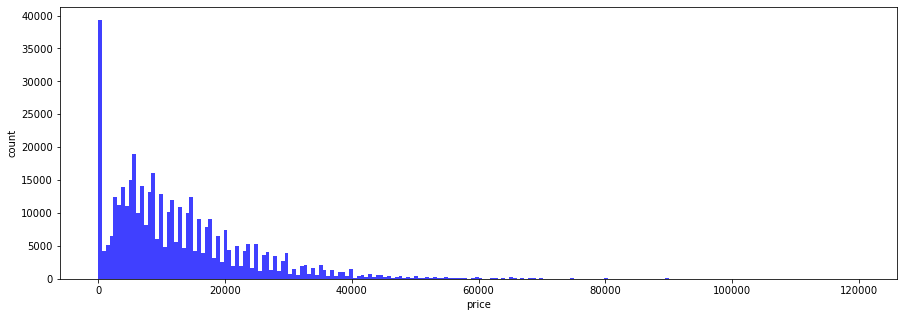

In [10]:
plt.figure(figsize=(15,5))

plt.hist(df['price'], 200,range=[0, 120000 ], facecolor='b', alpha=0.75)
plt.xlabel('price')
plt.ylabel('count')
plt.show()


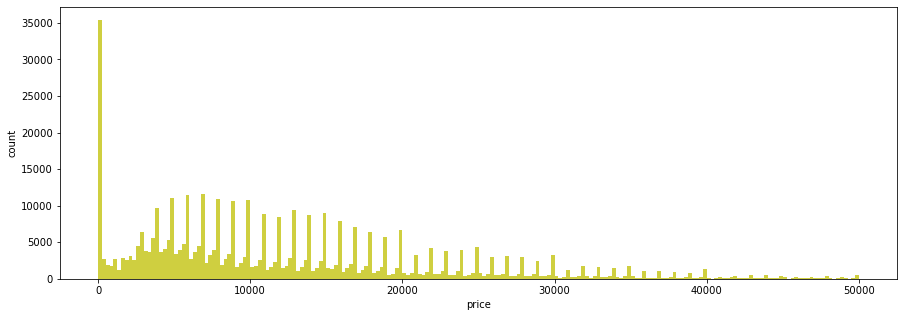

In [11]:
plt.figure(figsize=(15,5))

plt.hist(df['price'], 200,range=[0, 50000], facecolor='y', alpha=0.75)
plt.xlabel('price')
plt.ylabel('count')
plt.show()


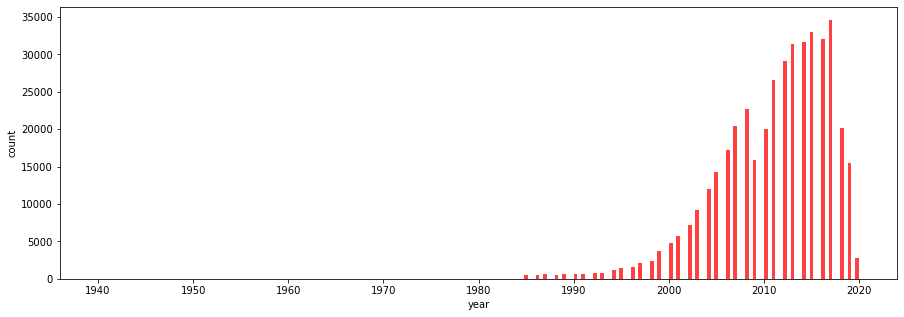

In [12]:
plt.figure(figsize=(15,5))
plt.xlabel('year')
plt.ylabel('count')
plt.hist(df['year'], 200, range=[1940, 2020 ],facecolor='r', alpha=0.75)
plt.show()


C:\Users\Lucia Casucci\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lucia Casucci\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


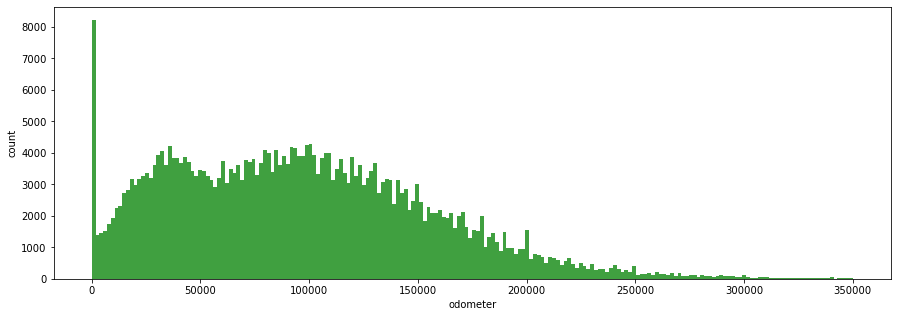

In [13]:
plt.figure(figsize=(15,5))

plt.hist(df['odometer'], 200, range=[0, 350000 ],facecolor='g', alpha=0.75)
plt.xlabel('odometer')
plt.ylabel('count')
plt.show()


### How are the categorical variables distributed?

In [14]:
categorical = [
  'condition', 'cylinders', 'fuel', 'title_status','transmission','drive', 'size','type','paint_color','state'
]

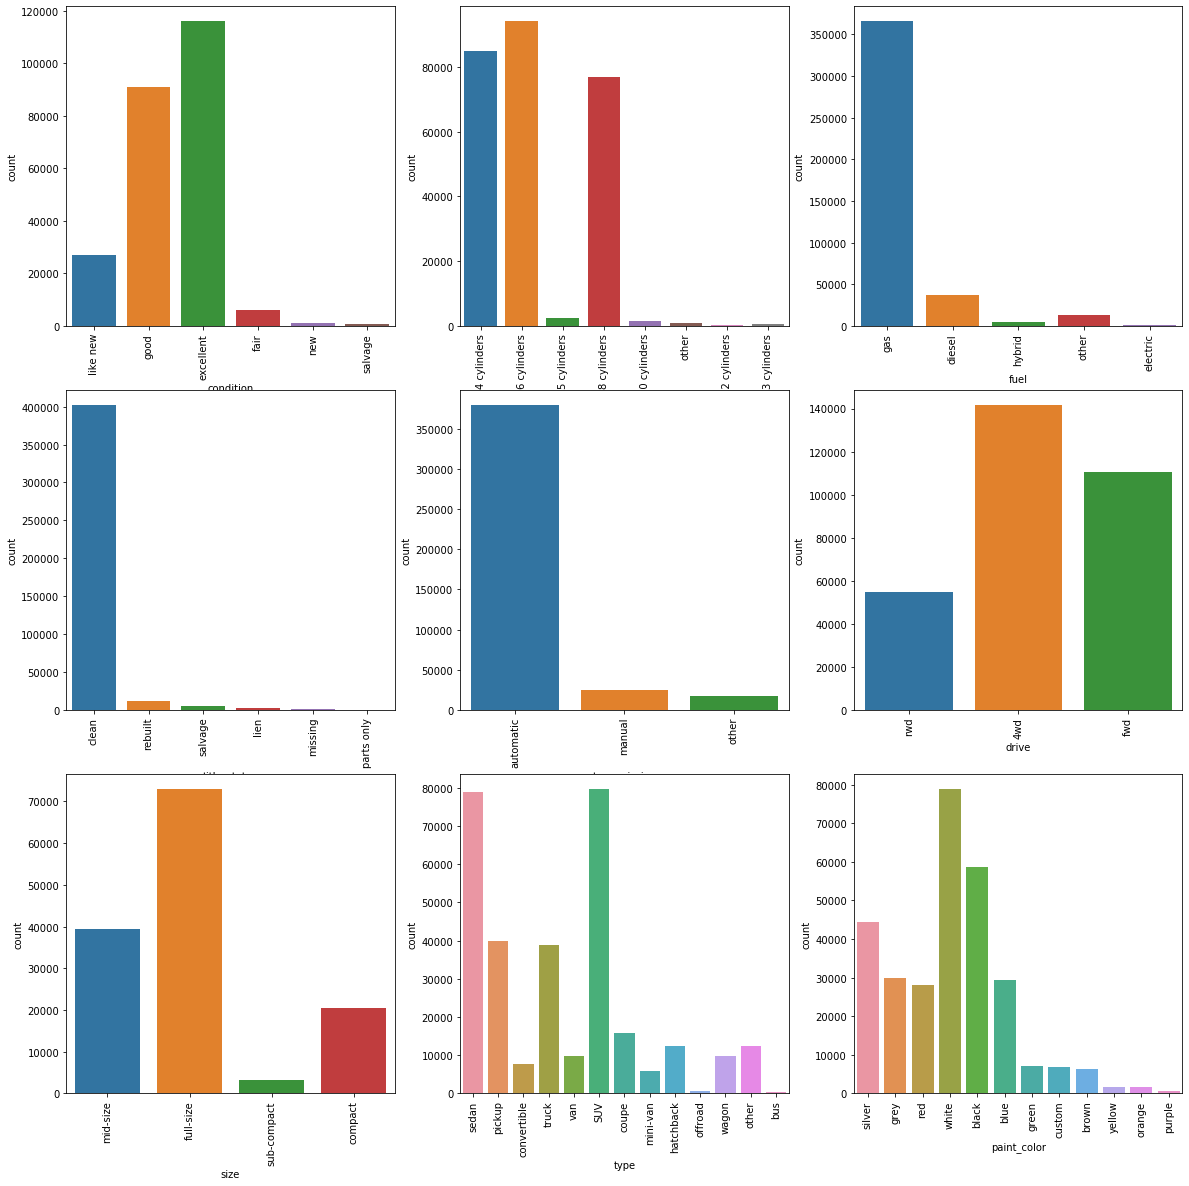

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

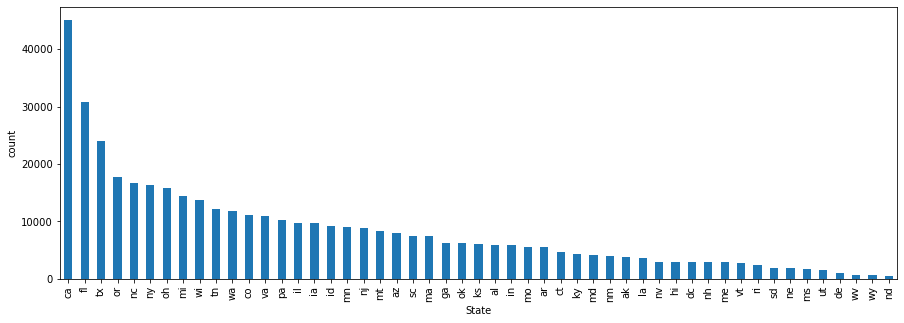

In [16]:
plt.figure(figsize=(15,5))
plt.xlabel('State')
plt.ylabel('count')
df['state'].value_counts().plot(kind='bar')
plt.show()


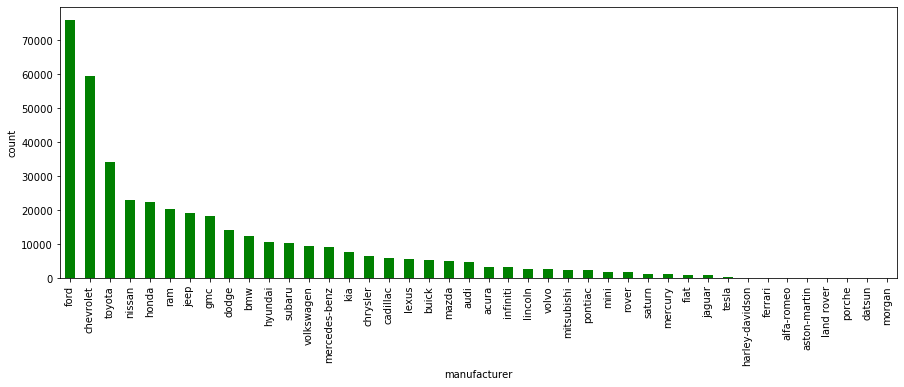

In [17]:
plt.figure(figsize=(15,5))
plt.xlabel('manufacturer')
plt.ylabel('count')
df['manufacturer'].value_counts().plot(kind='bar', color = 'g')
plt.show()


### Deal with missing values

In [18]:
nulls = df.isnull().sum()
nulls[nulls > 0]

manufacturer     17373
condition       181713
cylinders       162404
fuel              2694
odometer         68715
title_status      1564
transmission      2082
drive           117203
size            288086
type            111974
paint_color     130474
lat               8160
long              8160
dtype: int64

I will drop the 5 columns that contain only a couple of thousands missing values 

In [19]:
df.dropna(subset = ['fuel','title_status','transmission','lat','long'], inplace=True)





In [20]:
df = df.fillna(df.mode().iloc[0])


### Correlation matrix

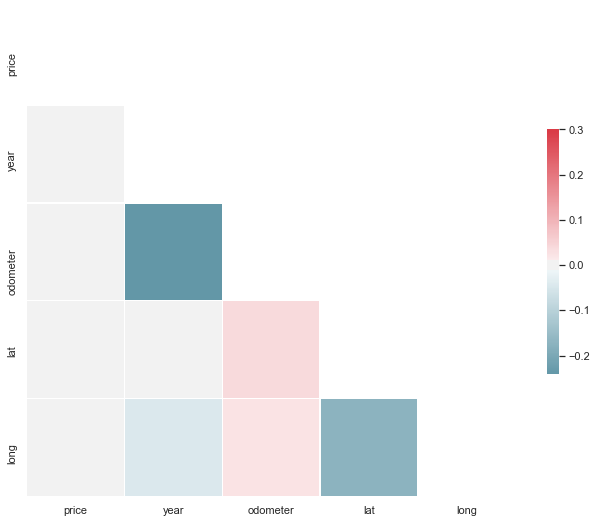

In [21]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.shape

(410714, 17)

In [23]:
df11 = df.iloc[:, 15:17]

In [24]:
df11.head()

,lat,long
0,34.4554,-114.2690
1,46.1837,-123.8240
2,34.9352,-81.9654
3,34.4783,-114.2710
5,42.8424,-71.1077


### Use of KNN Clustering on the geographical area to reduce the number of dimensions

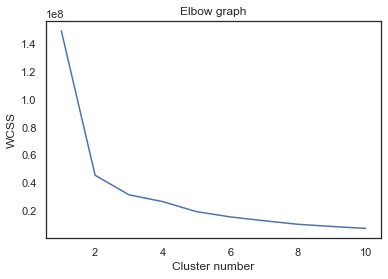

In [25]:
from sklearn.cluster import KMeans
import matplotlib

#grouped_clustering = rome_grouped.drop('Neighborhood', 1)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df11)
    wcss.append(kmeans.inertia_)


# In[221]:


plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.cluster import KMeans
k=3
#NY_clustering = df1(['latitude','longitude']
kmeans = KMeans(n_clusters = k,random_state=0).fit(df11)
kmeans.labels_
df.insert(0, 'Cluster', kmeans.labels_)

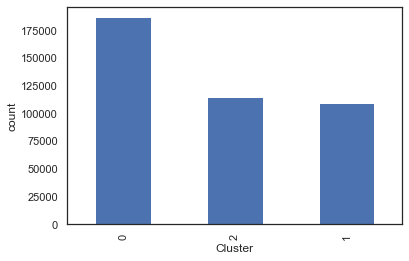

In [27]:
plt.xlabel('Cluster')
plt.ylabel('count')
df['Cluster'].value_counts().plot(kind='bar')
plt.show()

### More EDA on the missing values : odometer and price

In [28]:
df.drop(['region','state','lat','long'], axis = 1, inplace=True) 

A problem that rises is when people want to sell an object and list it with a price of 0 to make it come up at the beginning
of the user's search list in the engine, even if they do not intend to sell it for 0 dollars! The same thing happen for 
cars listed for very low and unrealistic prices to attract users (1$ , 2$) or odometer readings.
Sometimes this trick is done with the odometer value too, and that would explain the missing values or 0s in those fields.
I will keep these records and substitue the missing values/"fake" 0 values (or anything less than 100 dollars or 1000 miles) with the median price and odometer of the 
vehicles produced in the same year as the record to be substituted

In [29]:
df.head()

,Cluster,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,silver
1,1,13750,2014.0,bmw,good,6 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey
2,0,2300,2001.0,dodge,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,SUV,white
3,1,9000,2004.0,chevrolet,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red
5,0,500,2010.0,ford,excellent,6 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,white


In [30]:
df['odo'] = round(df['odometer'] /1000)

In [31]:
df.head()

,Cluster,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odo
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,silver,0.0
1,1,13750,2014.0,bmw,good,6 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,76.0
2,0,2300,2001.0,dodge,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,SUV,white,199.0
3,1,9000,2004.0,chevrolet,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,54.0
5,0,500,2010.0,ford,excellent,6 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,white,0.0


In [33]:
group = df.groupby( 'year')['price'].median()


In [34]:
grouped = group.to_frame().reset_index()

In [35]:
grouped.head(3)

,year,price
0,1985.0,6000
1,1986.0,5800
2,1987.0,7000


In [36]:
new = pd.merge(df, grouped, on = 'year')

In [37]:
new.head()

,Cluster,price_x,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odo,price_y
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,silver,0.0,9990
1,1,0,2012.0,ram,excellent,6 cylinders,diesel,116515.0,clean,automatic,4wd,full-size,truck,white,117.0,9990
2,1,16988,2012.0,nissan,excellent,6 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,white,0.0,9990
3,1,12998,2012.0,acura,good,6 cylinders,gas,132867.0,clean,automatic,4wd,full-size,SUV,black,133.0,9990
4,1,17998,2012.0,ram,good,8 cylinders,gas,103492.0,clean,automatic,4wd,full-size,truck,black,103.0,9990


In [38]:
new['price_x'].mask(new['price_x'] < 50  , new['price_y'], inplace=True)

In [39]:
new.head()

,Cluster,price_x,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odo,price_y
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,silver,0.0,9990
1,1,9990,2012.0,ram,excellent,6 cylinders,diesel,116515.0,clean,automatic,4wd,full-size,truck,white,117.0,9990
2,1,16988,2012.0,nissan,excellent,6 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,white,0.0,9990
3,1,12998,2012.0,acura,good,6 cylinders,gas,132867.0,clean,automatic,4wd,full-size,SUV,black,133.0,9990
4,1,17998,2012.0,ram,good,8 cylinders,gas,103492.0,clean,automatic,4wd,full-size,truck,black,103.0,9990


In [40]:
group1 = new.groupby( 'year')['odo'].median()


In [41]:
grouped1 = group1.to_frame().reset_index()

In [42]:
grouped1.tail(50)

,year,odo
0,1985.0,44.0
1,1986.0,23.5
2,1987.0,9.5
3,1988.0,52.0
4,1989.0,59.0
5,1990.0,57.5
6,1991.0,63.0
7,1992.0,70.0
8,1993.0,74.5
9,1994.0,91.0


In [43]:
new1 = pd.merge(new, grouped1, on = 'year')

In [44]:
new1.head()

,Cluster,price_x,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odo_x,price_y,odo_y
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,silver,0.0,9990,95.0
1,1,9990,2012.0,ram,excellent,6 cylinders,diesel,116515.0,clean,automatic,4wd,full-size,truck,white,117.0,9990,95.0
2,1,16988,2012.0,nissan,excellent,6 cylinders,gas,0.0,clean,automatic,4wd,full-size,SUV,white,0.0,9990,95.0
3,1,12998,2012.0,acura,good,6 cylinders,gas,132867.0,clean,automatic,4wd,full-size,SUV,black,133.0,9990,95.0
4,1,17998,2012.0,ram,good,8 cylinders,gas,103492.0,clean,automatic,4wd,full-size,truck,black,103.0,9990,95.0


In [45]:
new1['odo_x'].mask(new1['odo_x'] < 1  , new1['odo_y'], inplace=True)

In [46]:
new1.tail(30)

,Cluster,price_x,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odo_x,price_y,odo_y
410684,2,10900,1990.0,ford,good,6 cylinders,gas,93200.0,clean,automatic,4wd,full-size,SUV,blue,93.0,4800,57.5
410685,0,12800,1990.0,chevrolet,like new,8 cylinders,gas,41600.0,clean,automatic,rwd,mid-size,convertible,white,42.0,4800,57.5
410686,1,6000,1990.0,chevrolet,good,8 cylinders,gas,178000.0,clean,automatic,rwd,full-size,truck,white,178.0,4800,57.5
410687,0,2500,1990.0,mercedes-benz,fair,8 cylinders,gas,250000.0,clean,automatic,rwd,full-size,sedan,brown,250.0,4800,57.5
410688,0,5900,1990.0,jeep,good,6 cylinders,gas,183000.0,clean,manual,4wd,full-size,SUV,white,183.0,4800,57.5
410689,2,2700,1990.0,ford,excellent,4 cylinders,gas,149800.0,rebuilt,automatic,fwd,compact,coupe,red,150.0,4800,57.5
410690,0,8750,1990.0,chevrolet,good,8 cylinders,gas,165587.0,clean,automatic,4wd,full-size,pickup,blue,166.0,4800,57.5
410691,1,5000,1990.0,ford,good,6 cylinders,gas,105000.0,clean,automatic,4wd,full-size,pickup,red,105.0,4800,57.5
410692,0,3499,1990.0,mercedes-benz,good,6 cylinders,gas,112000.0,clean,automatic,4wd,full-size,sedan,white,112.0,4800,57.5
410693,0,4800,1990.0,ford,excellent,6 cylinders,gas,15900.0,clean,automatic,4wd,full-size,SUV,white,16.0,4800,57.5


In [47]:
new1.describe()

,Cluster,price_x,year,odometer,odo_x,price_y,odo_y
count,410714.000000,4.107140e+05,410714.000000,4.107140e+05,410714.000000,410714.000000,410714.000000
mean,0.825292,4.712984e+04,2010.892848,8.288199e+04,99.976274,11181.539198,85.491021
std,0.839193,7.859209e+06,5.921201,9.712059e+04,90.150780,5535.020934,35.214269
min,0.000000,5.000000e+01,1985.000000,0.000000e+00,0.000000,3495.000000,0.000000
25%,0.000000,5.995000e+03,2007.000000,2.300000e+04,54.000000,5995.000000,52.000000
50%,1.000000,1.099900e+04,2012.000000,7.591800e+04,96.000000,9990.000000,95.000000
75%,2.000000,1.823900e+04,2015.000000,1.260000e+05,127.000000,15500.000000,120.000000
max,2.000000,2.525141e+09,2020.000000,1.000000e+07,10000.000000,26194.000000,127.000000


### How do the distributions change with the price and odometers substitution of the "fake" values ? 

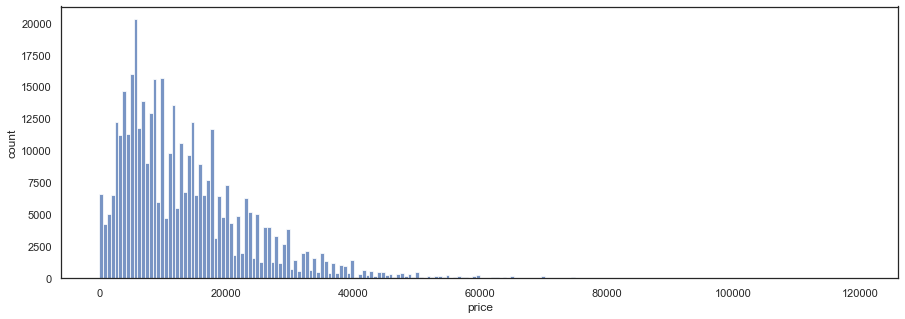

In [48]:
plt.figure(figsize=(15,5))

plt.hist(new1['price_x'], 200,range=[0, 120000 ], facecolor='b', alpha=0.75)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

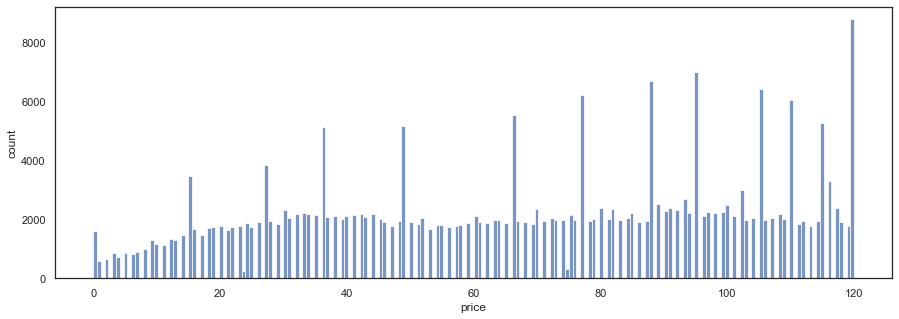

In [49]:
plt.figure(figsize=(15,5))

plt.hist(new1['odo_x'], 200,range=[0, 120 ], facecolor='b', alpha=0.75)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [50]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410714 entries, 0 to 410713
Data columns (total 17 columns):
Cluster         410714 non-null int32
price_x         410714 non-null int64
year            410714 non-null float64
manufacturer    410714 non-null object
condition       410714 non-null object
cylinders       410714 non-null object
fuel            410714 non-null object
odometer        410714 non-null float64
title_status    410714 non-null object
transmission    410714 non-null object
drive           410714 non-null object
size            410714 non-null object
type            410714 non-null object
paint_color     410714 non-null object
odo_x           410714 non-null float64
price_y         410714 non-null int64
odo_y           410714 non-null float64
dtypes: float64(4), int32(1), int64(2), object(10)
memory usage: 54.8+ MB


In [51]:
new1.describe()

,Cluster,price_x,year,odometer,odo_x,price_y,odo_y
count,410714.000000,4.107140e+05,410714.000000,4.107140e+05,410714.000000,410714.000000,410714.000000
mean,0.825292,4.712984e+04,2010.892848,8.288199e+04,99.976274,11181.539198,85.491021
std,0.839193,7.859209e+06,5.921201,9.712059e+04,90.150780,5535.020934,35.214269
min,0.000000,5.000000e+01,1985.000000,0.000000e+00,0.000000,3495.000000,0.000000
25%,0.000000,5.995000e+03,2007.000000,2.300000e+04,54.000000,5995.000000,52.000000
50%,1.000000,1.099900e+04,2012.000000,7.591800e+04,96.000000,9990.000000,95.000000
75%,2.000000,1.823900e+04,2015.000000,1.260000e+05,127.000000,15500.000000,120.000000
max,2.000000,2.525141e+09,2020.000000,1.000000e+07,10000.000000,26194.000000,127.000000


In [52]:
new1.median()

Cluster         1.0
price_x     10999.0
year         2012.0
odometer    75918.0
odo_x          96.0
price_y      9990.0
odo_y          95.0
dtype: float64

### One hot encoding / encode the dummy variables for any categorical feature. Avoid the dummy variable trap by dropping one of each column set generated

In [55]:
new1.drop(new1.loc[new1['price_x']> ( 60000)].index, inplace=True)

In [58]:
new1.drop(new1.loc[new1['odo_x']> ( 250)].index, inplace=True)

In [59]:
new1.drop(['odometer','odo_y','price_y'], axis = 1, inplace=True) 

In [60]:
new1.head(2)

,Cluster,price_x,year,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,odo_x
0,1,3495,2012.0,jeep,like new,4 cylinders,gas,clean,automatic,4wd,full-size,SUV,silver,95.0
1,1,9990,2012.0,ram,excellent,6 cylinders,diesel,clean,automatic,4wd,full-size,truck,white,117.0


In [61]:

pt_dummies = pd.get_dummies(new1.manufacturer)
dff1 = pd.concat([pt_dummies,new1 ], axis=1)

In [62]:
dff1.head()

,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,...,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,odo_x
0,0,0,0,0,0,0,0,0,0,0,...,like new,4 cylinders,gas,clean,automatic,4wd,full-size,SUV,silver,95.0
1,0,0,0,0,0,0,0,0,0,0,...,excellent,6 cylinders,diesel,clean,automatic,4wd,full-size,truck,white,117.0
2,0,0,0,0,0,0,0,0,0,0,...,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,white,95.0
3,1,0,0,0,0,0,0,0,0,0,...,good,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,black,133.0
4,0,0,0,0,0,0,0,0,0,0,...,good,8 cylinders,gas,clean,automatic,4wd,full-size,truck,black,103.0


In [64]:
#to avoid the dummy variable tap

dff1.drop('acura',axis =1, inplace=True)

In [65]:

pt_dummies = pd.get_dummies(dff1.condition)
dff1 = pd.concat([pt_dummies,dff1 ], axis=1)

In [66]:
dff1.head(2)

,excellent,fair,good,like new,new,salvage,alfa-romeo,aston-martin,audi,bmw,...,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,odo_x
0,0,0,0,1,0,0,0,0,0,0,...,like new,4 cylinders,gas,clean,automatic,4wd,full-size,SUV,silver,95.0
1,1,0,0,0,0,0,0,0,0,0,...,excellent,6 cylinders,diesel,clean,automatic,4wd,full-size,truck,white,117.0


In [67]:
dff1.drop('excellent',axis =1, inplace=True)

In [68]:
pt_dummies = pd.get_dummies(dff1.title_status)
dff1 = pd.concat([pt_dummies,dff1 ], axis=1)

In [70]:
dff1.drop('parts only',axis =1, inplace=True)

In [83]:
dff2 = dff1.drop(['price_x', 'manufacturer','condition','title_status'], axis = 1) 

In [84]:
dff2.head()

,clean,lien,missing,rebuilt,salvage,fair,good,like new,new,salvage,...,Cluster,year,cylinders,fuel,transmission,drive,size,type,paint_color,odo_x
0,1,0,0,0,0,0,0,1,0,0,...,1,2012.0,4 cylinders,gas,automatic,4wd,full-size,SUV,silver,95.0
1,1,0,0,0,0,0,0,0,0,0,...,1,2012.0,6 cylinders,diesel,automatic,4wd,full-size,truck,white,117.0
2,1,0,0,0,0,0,0,0,0,0,...,1,2012.0,6 cylinders,gas,automatic,4wd,full-size,SUV,white,95.0
3,1,0,0,0,0,0,1,0,0,0,...,1,2012.0,6 cylinders,gas,automatic,4wd,full-size,SUV,black,133.0
4,1,0,0,0,0,0,1,0,0,0,...,1,2012.0,8 cylinders,gas,automatic,4wd,full-size,truck,black,103.0


In [91]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403178 entries, 0 to 410713
Data columns (total 61 columns):
clean              403178 non-null uint8
lien               403178 non-null uint8
missing            403178 non-null uint8
rebuilt            403178 non-null uint8
salvage            403178 non-null uint8
fair               403178 non-null uint8
good               403178 non-null uint8
like new           403178 non-null uint8
new                403178 non-null uint8
salvage            403178 non-null uint8
alfa-romeo         403178 non-null uint8
aston-martin       403178 non-null uint8
audi               403178 non-null uint8
bmw                403178 non-null uint8
buick              403178 non-null uint8
cadillac           403178 non-null uint8
chevrolet          403178 non-null uint8
chrysler           403178 non-null uint8
datsun             403178 non-null uint8
dodge              403178 non-null uint8
ferrari            403178 non-null uint8
fiat               403178 no

In [95]:
dff3 = dff2[['cylinders','fuel','transmission','drive','size','type','paint_color']]


#df1 = df[['a','b']]


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in dff3:
    if dff3[col].dtypes=='object':
        dff3[col]=le.fit_transform(dff3[col])




C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [102]:
df_concat = pd.concat([dff1, dff3], axis=1)

In [103]:
df_concat.head()

,clean,lien,missing,rebuilt,salvage,fair,good,like new,new,salvage,...,type,paint_color,odo_x,cylinders,fuel,transmission,drive,size,type,paint_color
0,1,0,0,0,0,0,0,1,0,0,...,SUV,silver,95.0,3,2,0,0,1,0,9
1,1,0,0,0,0,0,0,0,0,0,...,truck,white,117.0,5,0,0,0,1,10,10
2,1,0,0,0,0,0,0,0,0,0,...,SUV,white,95.0,5,2,0,0,1,0,10
3,1,0,0,0,0,0,1,0,0,0,...,SUV,black,133.0,5,2,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,truck,black,103.0,6,2,0,0,1,10,0


In [104]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403178 entries, 0 to 410713
Data columns (total 72 columns):
clean              403178 non-null uint8
lien               403178 non-null uint8
missing            403178 non-null uint8
rebuilt            403178 non-null uint8
salvage            403178 non-null uint8
fair               403178 non-null uint8
good               403178 non-null uint8
like new           403178 non-null uint8
new                403178 non-null uint8
salvage            403178 non-null uint8
alfa-romeo         403178 non-null uint8
aston-martin       403178 non-null uint8
audi               403178 non-null uint8
bmw                403178 non-null uint8
buick              403178 non-null uint8
cadillac           403178 non-null uint8
chevrolet          403178 non-null uint8
chrysler           403178 non-null uint8
datsun             403178 non-null uint8
dodge              403178 non-null uint8
ferrari            403178 non-null uint8
fiat               403178 no

In [ ]:
dff22 = df_concat.drop(['price_x', 'manufacturer','condition','title_status'], axis = 1) 



In [105]:
df = df_concat.select_dtypes(exclude=['object'])

        clean  lien  missing  rebuilt  salvage  fair  good  like new  new  \
0           1     0        0        0        0     0     0         1    0   
1           1     0        0        0        0     0     0         0    0   
2           1     0        0        0        0     0     0         0    0   
3           1     0        0        0        0     0     1         0    0   
4           1     0        0        0        0     0     1         0    0   
5           1     0        0        0        0     0     1         0    0   
6           1     0        0        0        0     0     1         0    0   
7           1     0        0        0        0     0     1         0    0   
8           1     0        0        0        0     0     1         0    0   
9           0     0        0        0        1     0     0         0    0   
10          1     0        0        0        0     0     0         0    0   
11          1     0        0        0        0     0     0         0    0   

In [106]:
df.head()

,clean,lien,missing,rebuilt,salvage,fair,good,like new,new,salvage,...,price_x,year,odo_x,cylinders,fuel,transmission,drive,size,type,paint_color
0,1,0,0,0,0,0,0,1,0,0,...,3495,2012.0,95.0,3,2,0,0,1,0,9
1,1,0,0,0,0,0,0,0,0,0,...,9990,2012.0,117.0,5,0,0,0,1,10,10
2,1,0,0,0,0,0,0,0,0,0,...,16988,2012.0,95.0,5,2,0,0,1,0,10
3,1,0,0,0,0,0,1,0,0,0,...,12998,2012.0,133.0,5,2,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,17998,2012.0,103.0,6,2,0,0,1,10,0


In [110]:
y = df['price_x'].values

In [111]:
dff2 = df.drop(['price_x'], axis = 1) 

In [112]:
dff2.head()

,clean,lien,missing,rebuilt,salvage,fair,good,like new,new,salvage,...,Cluster,year,odo_x,cylinders,fuel,transmission,drive,size,type,paint_color
0,1,0,0,0,0,0,0,1,0,0,...,1,2012.0,95.0,3,2,0,0,1,0,9
1,1,0,0,0,0,0,0,0,0,0,...,1,2012.0,117.0,5,0,0,0,1,10,10
2,1,0,0,0,0,0,0,0,0,0,...,1,2012.0,95.0,5,2,0,0,1,0,10
3,1,0,0,0,0,0,1,0,0,0,...,1,2012.0,133.0,5,2,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,2012.0,103.0,6,2,0,0,1,10,0


### Standard Scaler and train/test split

In [113]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = dff2
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model 1 : multiple linear regression 

In [115]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
y_predLR =lm.predict(X_test)

In [117]:
import statsmodels.api as sm
est = sm.OLS(y_train,X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.189
Model:                            OLS   Adj. R-squared (uncentered):              0.189
Method:                 Least Squares   F-statistic:                              1236.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:16:43   Log-Likelihood:                     -3.5607e+06
No. Observations:              322542   AIC:                                  7.121e+06
Df Residuals:                  322481   BIC:                                  7.122e+06
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1208.1829    246.626      4.899      0.000     724.802    1691.564
x2           622.4534     96.759      6.433      0.000     432.808     812.099
x3           108.6820     42.279      2.571      0.010      25.817     191.547
x4           273.0268    189.522      1.441      0.150     -98.432     644.485
x5           214.8538    132.767      1.618      0.106     -45.365     475.073
x6          -206.1210     27.163     -7.588      0.000    -259.359    -152.883
x7          -225.7999     28.477     -7.929      0.000    -281.614    -169.986
x8             0.2531     27.081      0.009      0.993     -52.825      53.331
x9            50.6217     26.771      1.891      0.059      -1.848     103.092
x10          -66.4783     26.914     -2.470      0.014    -119.228     -13.728
x11           71.7079     28.174      2.545      0.011      16.488     126.928
x12          226.6956     23.835      9.511      0.000     179.980     273.411
x13          146.1402     41.635      3.510      0.000      64.537     227.744
x14          101.6082     56.456      1.800      0.072      -9.044     212.260
x15         -271.0660     42.797     -6.334      0.000    -354.947    -187.185
x16          156.9099     44.220      3.548      0.000      70.241     243.579
x17          363.9942    106.315      3.424      0.001     155.619     572.369
x18         -349.9911     45.299     -7.726      0.000    -438.776    -261.206
x19           31.9355     26.566      1.202      0.229     -20.133      84.003
x20         -299.6578     59.362     -5.048      0.000    -416.006    -183.309
x21           36.1884     29.662      1.220      0.222     -21.948      94.324
x22         -293.0761     30.057     -9.751      0.000    -351.986    -234.166
x23          645.4945    124.563      5.182      0.000     401.354     889.635
x24          854.5115     66.113     12.925      0.000     724.933     984.090
x25          -26.9643     26.793     -1.006      0.314     -79.477      25.548
x26         -118.0275     71.790     -1.644      0.100    -258.733      22.678
x27         -598.9220     53.668    -11.160      0.000    -704.109    -493.735
x28           42.6422     37.330      1.142      0.253     -30.523     115.808
x29          136.0630     29.883      4.553      0.000      77.494     194.632
x30          337.9736     67.851      4.981      0.000     204.988     470.959
x31         -586.7187     48.433    -12.114      0.000    -681.645    -491.792
x32           -4.1154     26.335     -0.156      0.876     -55.730      47.499
x33          238.6472     43.013      5.548      0.000     154.342     322.952
x34          -75.4739     35.836     -2.106      0.035    -145.712      -5.236
x35         -180.5565     42.461     -4.252      0.000    -26

In [118]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predLR))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predLR))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predLR)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predLR))
print('R squared', metrics.r2_score(y_test,y_predLR))

Mean Absolute Error:  4773.73189592255
Mean Squared Error:  45412293.80271986
Root Mean Squared Error:  6738.864429762619
Explained Variance Score:  0.5356154974453735
R squared 0.5356126570063556


### Model 2 : Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [120]:
y_predRF=rf.predict(X_test)


In [121]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRF))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  2428.624748273206
Mean Squared Error:  19819729.086845025
Root Mean Squared Error:  4451.935431567379
Explained Variance Score:  0.7973615848811612
R squared 0.7973229150353431


Feature ranking:
1. feature 52 (0.373962)
2. feature 53 (0.158286)
3. feature 55 (0.098593)
4. feature 54 (0.071841)
5. feature 57 (0.049178)
6. feature 59 (0.042803)
7. feature 60 (0.030488)
8. feature 51 (0.025172)
9. feature 49 (0.011911)
10. feature 22 (0.010415)
11. feature 56 (0.009858)
12. feature 6 (0.009277)
13. feature 16 (0.007346)
14. feature 58 (0.007275)
15. feature 7 (0.006801)
16. feature 23 (0.006330)
17. feature 48 (0.005510)
18. feature 43 (0.005248)
19. feature 29 (0.005237)
20. feature 40 (0.005074)
21. feature 0 (0.004961)
22. feature 35 (0.004458)
23. feature 13 (0.004363)
24. feature 19 (0.003385)
25. feature 44 (0.003336)
26. feature 15 (0.003310)
27. feature 12 (0.003299)
28. feature 47 (0.002757)
29. feature 32 (0.002725)
30. feature 26 (0.002435)
31. feature 25 (0.002421)
32. feature 5 (0.002025)
33. feature 3 (0.001991)
34. feature 1 (0.001611)
35. feature 4 (0.001548)
36. feature 30 (0.001530)
37. feature 46 (0.001493)
38. feature 50 (0.001475)
39. feature

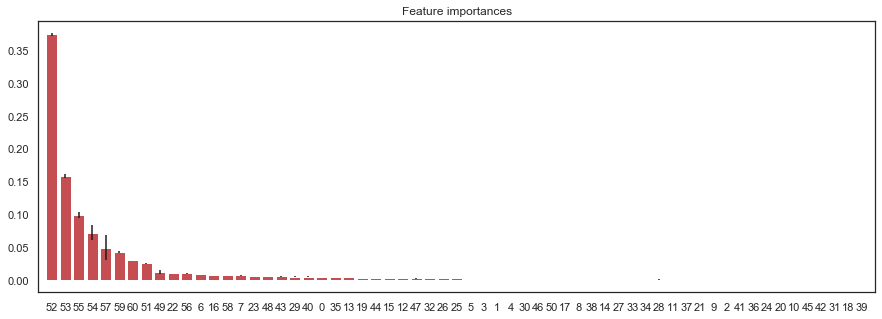

In [145]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model 3 : XG boost

In [124]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
eval_set = [(X_train,y_train), (X_test,y_test)]
xg_reg.fit(X_train,y_train,early_stopping_rounds=45, eval_metric=["rmse"], eval_set=eval_set, verbose=True )

[0]	validation_0-rmse:12601.27441	validation_1-rmse:12588.74121
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 45 rounds.
[1]	validation_0-rmse:9899.39453	validation_1-rmse:9892.58008
[2]	validation_0-rmse:8220.94629	validation_1-rmse:8215.15234
[3]	validation_0-rmse:7230.76758	validation_1-rmse:7227.42627
[4]	validation_0-rmse:6616.62939	validation_1-rmse:6618.60498
[5]	validation_0-rmse:6273.55225	validation_1-rmse:6281.85938
[6]	validation_0-rmse:6074.44922	validation_1-rmse:6085.65576
[7]	validation_0-rmse:5948.35693	validation_1-rmse:5964.47803
[8]	validation_0-rmse:5866.04932	validation_1-rmse:5884.17236
[9]	validation_0-rmse:5806.25244	validation_1-rmse:5824.85156
[10]	validation_0-rmse:5758.63428	validation_1-rmse:5782.48975
[11]	validation_0-rmse:5715.82422	validation_1-rmse:5740.79053
[12]	validation_0-rmse:5690.46631	validation_1-rmse:5717.68897
[13]	validation_0-rmse:5631.38

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [125]:
y_predXGB = xg_reg.predict(X_test)
predictions = [round(value) for value in y_predXGB]

In [126]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXGB))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predXGB))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXGB)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXGB))
print('R squared', metrics.r2_score(y_test,y_predXGB))

Mean Absolute Error:  3290.939540312909
Mean Squared Error:  26741967.569772016
Root Mean Squared Error:  5171.263633752587
Explained Variance Score:  0.7265362130613422
R squared 0.7265359173421704


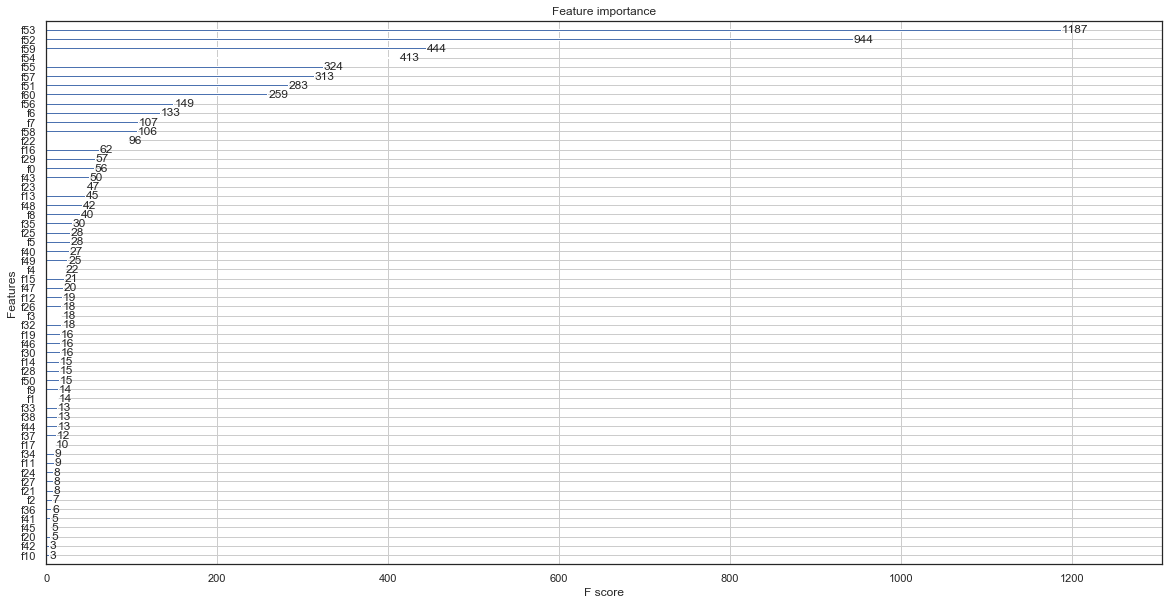

In [129]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

We can see in all the 3 models variable 53 and 55 are the most important when we want to determine the price. 
Other variable that played a significant impact where : type, drive, fuel ,and the condition like new or new.
